### Import necessary libraries

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#### Get the historical stock price of HDFC

In [2]:
# Define the date range
start_date = '2012-01-01'
end_date = '2024-01-01'

In [3]:
# Ticker symbol for HDFC Bank on NSE
ticker_symbol = 'HDFCBANK.NS'

# Fetch the stock data
stock = yf.Ticker(ticker_symbol)

# Get the historical stock data
hdfc_prc = stock.history(start=start_date, end=end_date)

In [4]:
hdfc_prc.shape
hdfc_prc.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-02 00:00:00+05:30,193.554086,193.960236,189.312055,192.628967,3514998,0.0,0.0


In [5]:
# Ticker symbol for Hindustan Uniliver on NSE
ticker_symbol = 'HINDUNILVR.NS'

# Fetch the stock data
stock = yf.Ticker(ticker_symbol)

# Get the historical stock data
hul_prc = stock.history(start=start_date, end=end_date)

In [6]:
hul_prc.shape
hul_prc.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-02 00:00:00+05:30,329.679886,331.174214,324.308407,325.03537,772876,0.0,0.0


#### Merging the 2 prices into a single DF

In [9]:
hdfc = hdfc_prc[['Open', 'Close']].reset_index()
hul = hul_prc[['Open','Close']].reset_index()

In [10]:
hdfc.columns = ['Date', 'HDFC_Open', 'HDFC_Close']
hul.columns = ['Date', 'HUL_Open', 'HUL_Close']

In [11]:
Stock_prc = pd.merge(hdfc, hul, on='Date', how='inner')

In [12]:
# Write the merged DataFrame to a CSV file
Stock_prc.to_csv('stock_prc_data.csv', index=False)

#### Generate a time series plot of the close value of HDFC Bank

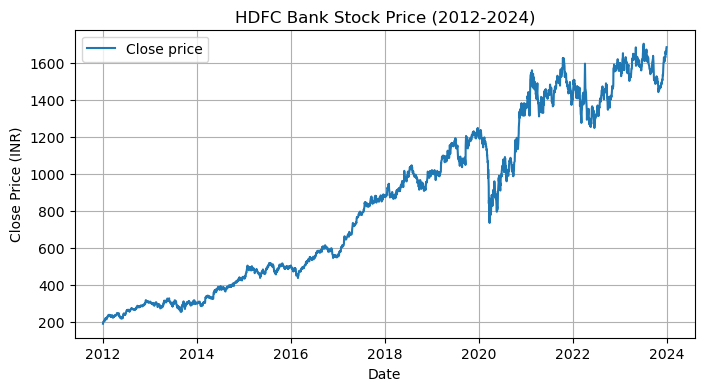

In [13]:
# Plot the 'Close' price time series
plt.figure(figsize=(8, 4))
plt.plot(hdfc_prc.index, hdfc_prc['Close'], label='Close price')
plt.title('HDFC Bank Stock Price (2012-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

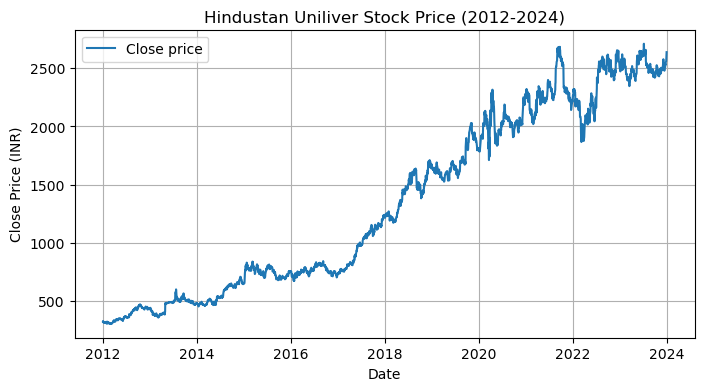

In [15]:
# Plot the 'Close' price time series
plt.figure(figsize=(8, 4))
plt.plot(hul_prc.index, hul_prc['Close'], label='Close price')
plt.title('Hindustan Uniliver Stock Price (2012-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.show()